In [118]:
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

file_path = "Surgical_Cases_fm_3.3.csv" #"cleaned.csv"
df = pd.read_csv(file_path,sep=',')

# trueTestDF=df[df['ResultAfterSurgery'].isnull()]
# df.dropna(subset=['ResultAfterSurgery'], how='all',axis=0,inplace=True)




df.columns

Index([u'Masked FIN', u'age', u'Sequence No.', u'SURG_PROCEDURE',
       u'Duration of Surgery (hh:mm).1', u'SURGICAL_SPECIALTY',
       u'Surgeon Hash Name', u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'SN - BM - PRBC Ordered',
       u'Allogeneic Blood Transfusion', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'ResultsBeforeSurgery',
       u'ResultAfterSurgery', u'EBL'],
      dtype='object')

In [119]:
df['SN - BM - PRBC Ordered']=df['SN - BM - PRBC Ordered'].fillna(0.0)

In [120]:
df=df.replace('.',0.0)

In [121]:
df['SN - BM - Pre-Op INR']=df['SN - BM - Pre-Op INR'].fillna(0.0)
df['SN - BM - Pre-Op Platelet Count']=df['SN - BM - Pre-Op Platelet Count'].fillna(0.0)

In [122]:
#age count is less since it has Nans which will be removed
df.describe()

,age,Sequence No.,SN - BM - PRBC Ordered,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,27196.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,19428.000000
mean,60.520702,14262.616416,1.269241,0.580626,0.340837,0.228373,0.766074,12.357422,11.177199
std,15.061706,8400.507829,3.482613,2.537552,2.042489,1.194519,4.938831,2.559800,2.035386
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107500,2.808300
25%,51.000000,6931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.802500,9.802900
50%,63.000000,14127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.804800,11.108800
75%,71.000000,21487.000000,2.052000,0.000000,0.000000,0.000000,0.000000,14.204900,12.603800
max,103.000000,29285.000000,414.601000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [123]:
#removing rows that have pre ordered blood 0 but the remaining four columns greater than 0
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].index,inplace=True)

(336, 19)


In [124]:
df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]]

,Masked FIN,age,Sequence No.,SURG_PROCEDURE,Duration of Surgery (hh:mm).1,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,SN - BM - PRBC Ordered,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery,EBL


In [125]:
#not needed
# print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].shape
# df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].index,inplace=True)

In [126]:
#not needed
# print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].shape
# df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].index,inplace=True)

In [127]:
# not needed
# print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].shape
# df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].index,inplace=True)

In [128]:
# print df['ResultsBeforeSurgery'].isnull().shape
# df.dropna(subset=['ResultsBeforeSurgery'], how='all',axis=0,inplace=True)

In [129]:
# columns that wont be necessary for predicting anemic status
del df['Masked FIN']
del df['Sequence No.']
del df['Duration of Surgery (hh:mm).1']
del df['SN - BM - PRBC Ordered']
del df['EBL']

In [130]:
# removing all rows with age Nan
print df[df['age'].isnull()].shape
df.drop(df[df['age'].isnull()].index,inplace=True)
df['ResultAfterSurgery']=df['ResultAfterSurgery'].fillna(0.0)

(21, 14)


In [131]:
df.describe()

,age,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000
mean,60.463738,0.537489,0.322581,0.219159,0.741284,12.375611,7.959865
std,15.076498,2.456286,1.989012,1.177527,4.887937,2.557242,5.353405
min,13.000000,0.000000,0.000000,0.000000,0.000000,3.107500,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,10.805475,0.000000
50%,63.000000,0.000000,0.000000,0.000000,0.000000,12.806200,10.103400
75%,71.000000,0.000000,0.000000,0.000000,0.000000,14.206000,12.002325
max,103.000000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [132]:
pd.isnull(df).any()

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool

In [133]:
# df['SURG_PROCEDURE']=pd.factorize(df['SURG_PROCEDURE'])

In [134]:
df.dtypes

age                                float64
SURG_PROCEDURE                      object
SURGICAL_SPECIALTY                  object
Surgeon Hash Name                   object
PATIENT_TYPE                        object
SN - BM - Pre-Op INR                object
SN - BM - Pre-Op Platelet Count     object
Allogeneic Blood Transfusion        object
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultsBeforeSurgery               float64
ResultAfterSurgery                 float64
dtype: object

In [135]:
#converting to categorical variables
df['SURG_PROCEDURE']=df['SURG_PROCEDURE'].apply(lambda x: x.upper())
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')

df['SURGICAL_SPECIALTY']=df['SURGICAL_SPECIALTY'].apply(lambda x: x.upper())
df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')

df['PATIENT_TYPE']=df['PATIENT_TYPE'].apply(lambda x: x.upper())
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')

df['Allogeneic Blood Transfusion']=df['Allogeneic Blood Transfusion'].apply(lambda x: x.upper())
df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')

df['Surgeon Hash Name']=df['Surgeon Hash Name'].apply(lambda x: x.upper())
df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')

df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')
df['SN - BM - Red Blood Cells'] = df['SN - BM - Red Blood Cells'].astype('double')
df['SN - BM - Fresh Frozen Plasma'] = df['SN - BM - Fresh Frozen Plasma'].astype('double')
df['SN - BM - Platelets'] = df['SN - BM - Platelets'].astype('double')
df['SN - BM - Cryoprecipitate'] = df['SN - BM - Cryoprecipitate'].astype('double')

In [136]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultsBeforeSurgery                float64
ResultAfterSurgery                  float64
dtype: object

In [137]:
# scaling the linear data
from sklearn import preprocessing
min_max_scaler=preprocessing.StandardScaler()
cols=['SN - BM - Red Blood Cells','SN - BM - Fresh Frozen Plasma','SN - BM - Platelets','SN - BM - Cryoprecipitate']
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df[cols]),columns=cols,index=df.index)

In [138]:
df = df.drop(cols, axis=1)

In [139]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,15.6063,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,14.5018,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,17.0057,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,13.3047,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,11.6062,10.2062


In [140]:
targetDF=df['ResultAfterSurgery']
df=df.ix[:,:-1]
df = df.join(df_scaled)
df= df.join(targetDF)


In [141]:
df.describe()

,age,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
count,26860.000000,26860.000000,26860.000000,26860.000000,2.686000e+04,2.686000e+04,26860.000000,2.686000e+04,26860.000000
mean,60.463738,1.020396,215.498048,12.375611,5.925598e-17,-3.597685e-17,0.000000,6.348855e-18,7.959865
std,15.076498,6.662063,734.670479,2.557242,1.000019e+00,1.000019e+00,1.000019,1.000019e+00,5.353405
min,13.000000,0.000000,0.000000,3.107500,-2.188259e-01,-1.621848e-01,-0.186121,-1.516587e-01,0.000000
25%,51.000000,0.904000,153.080000,10.805475,-2.188259e-01,-1.621848e-01,-0.186121,-1.516587e-01,0.000000
50%,63.000000,1.003000,218.040000,12.806200,-2.188259e-01,-1.621848e-01,-0.186121,-1.516587e-01,10.103400
75%,71.000000,1.008000,274.190000,14.206000,-2.188259e-01,-1.621848e-01,-0.186121,-1.516587e-01,12.002325
max,103.000000,732.682000,108032.460000,19.906300,2.913038e+01,2.749252e+01,48.225987,2.543159e+01,19.108500


In [142]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
ResultsBeforeSurgery               False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultAfterSurgery                 False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
ResultsBeforeSurgery                float64
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultAfterSurgery                  float64
dtype: object

In [143]:
#finding pearson corealtion between the columns
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

age                                0.055395
ResultsBeforeSurgery               0.051934
SN - BM - Red Blood Cells          0.013774
SN - BM - Cryoprecipitate          0.004847
SN - BM - Pre-Op Platelet Count    0.004598
SN - BM - Platelets                0.004030
SN - BM - Fresh Frozen Plasma     -0.003807
SN - BM - Pre-Op INR              -0.000753
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [144]:
#high correlated columns
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print unique_important_corrs

                                      attribute pair  correlation
4  (SN - BM - Fresh Frozen Plasma, SN - BM - Red ...     0.835903
3  (SN - BM - Fresh Frozen Plasma, SN - BM - Plat...     0.811183
1   (SN - BM - Platelets, SN - BM - Red Blood Cells)     0.765404
0   (SN - BM - Cryoprecipitate, SN - BM - Platelets)     0.740868
2  (SN - BM - Cryoprecipitate, SN - BM - Fresh Fr...     0.655142
5  (SN - BM - Cryoprecipitate, SN - BM - Red Bloo...     0.645614


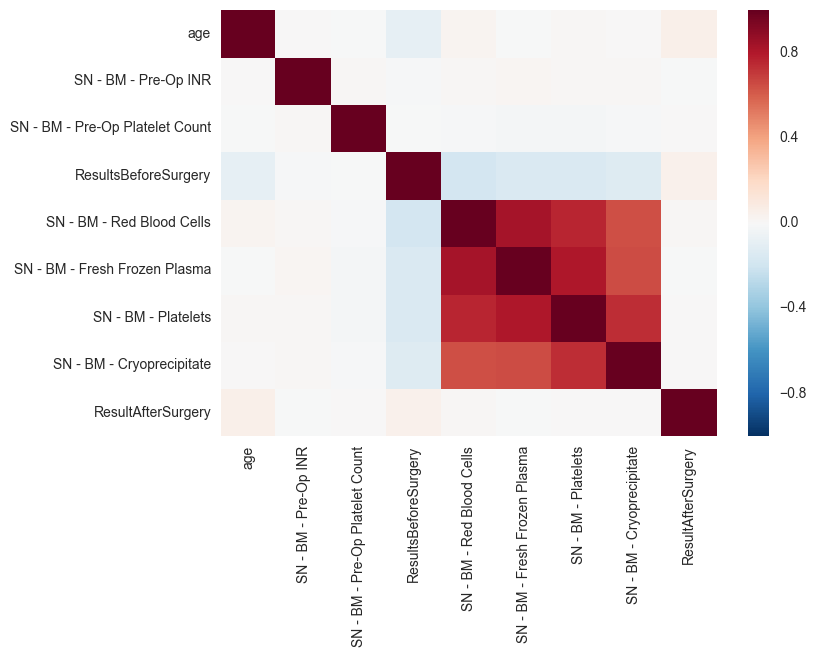

In [145]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pearson,vmin=-1, vmax=1)
plt.show()

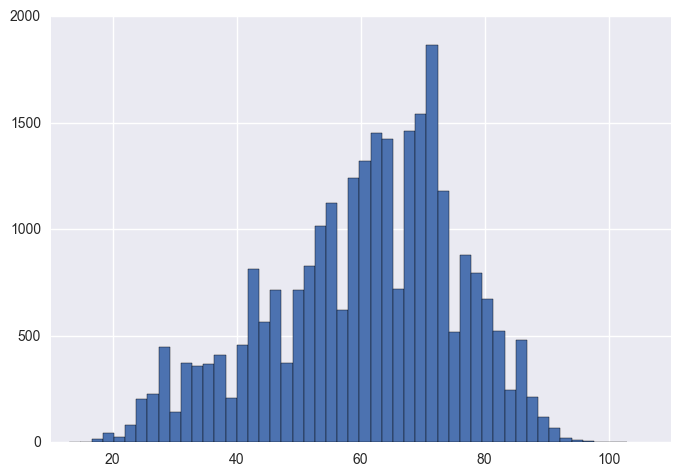

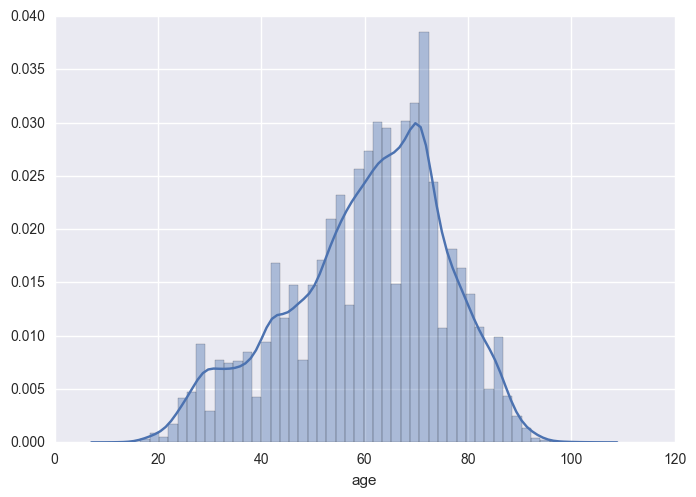

In [146]:
import matplotlib.pyplot as plt
attr = df['age']
# plt.hist(attr)
plt.hist(attr, bins=50)
plt.show()
sns.distplot(attr)
plt.show()
g=sns.pairplot(pearson)
# plt.show()
# g.show()


In [147]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,15.6063,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,14.5018,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,17.0057,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,13.3047,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,11.6062,-0.218826,-0.162185,-0.186121,-0.151659,10.2062


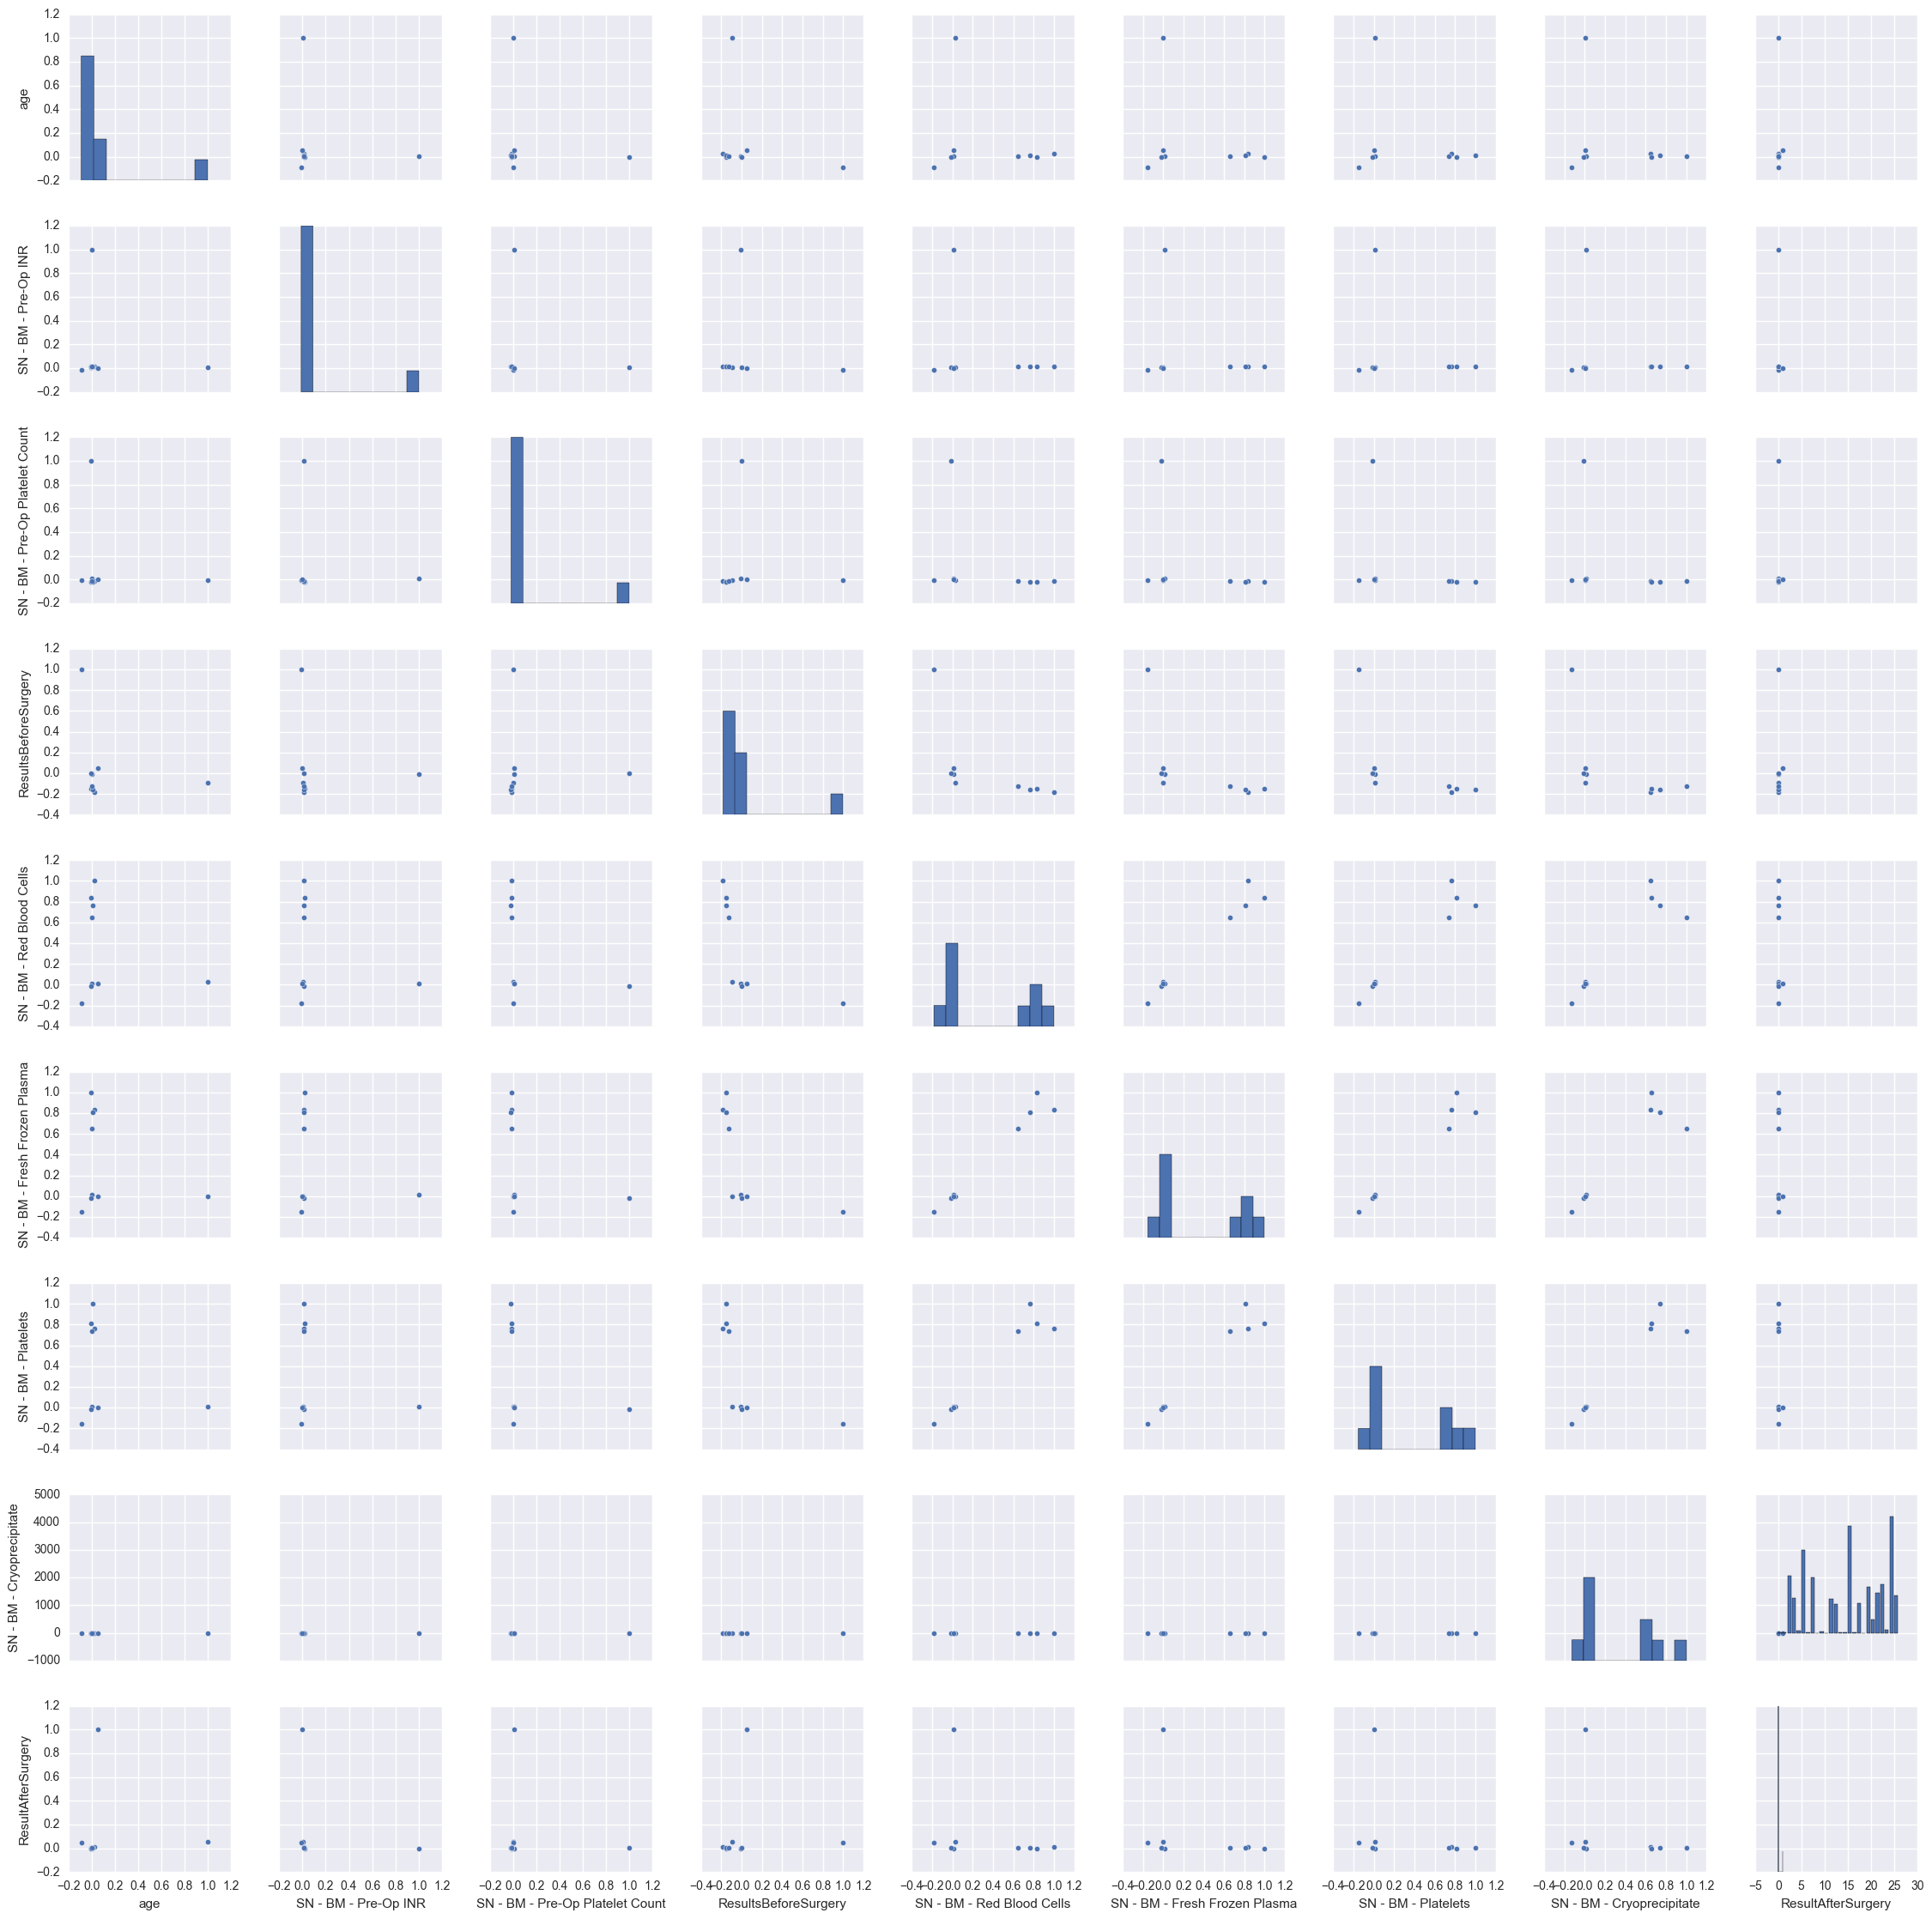

In [148]:
cat_attr = df['SURGICAL_SPECIALTY'].cat.codes
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts)
# or more compactly:
# plt.bar(*list(zip(*cat_attr.value_counts().i)))
plt.xticks()
plt.show()

In [149]:
grouped = df.groupby('SURGICAL_SPECIALTY')
print grouped.size()
print grouped.mean()

SURGICAL_SPECIALTY
ANESTHESIOLOGY                21
CARDIOLOGY                    10
CARDIOTHORACIC SURGERY      2077
COLORECTAL SURGERY          1274
CRITICAL CARE-TRAUMA          82
ENT                         2986
GASTROENTEROLOGY              18
GENERAL SURGERY             1996
INTERVENTIONAL RADIOLOGY       3
MISSING SPECIALTY             51
NEUROLOGY                      2
NEUROSURGERY                1231
OBGYN                       1033
OMFS                          15
OPTHALMOLOGY                  24
ORTHOPAEDIC SURGERY         3853
OTHER                         29
PLASTIC SURGERY             1086
PULMONOLOGY                    5
SPINE SURGERY               1660
SURGICAL ONCOLOGY            494
THORACIC SURGERY            1452
TRANSPLANTHEPATOBILIARY     1763
TRANSPLANTUROLOGY            129
UROLOGY                     4206
VASCULAR SURGERY            1360
dtype: int64
                                age  SN - BM - Pre-Op INR  \
SURGICAL_SPECIALTY                               

In [151]:
df.columns

Index([u'age', u'SURG_PROCEDURE', u'SURGICAL_SPECIALTY', u'Surgeon Hash Name',
       u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'Allogeneic Blood Transfusion',
       u'ResultsBeforeSurgery', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'ResultAfterSurgery'],
      dtype='object')

In [157]:
grouped = df.groupby('PATIENT_TYPE')
print grouped.size()

PATIENT_TYPE
DAY SURGERY             5952
EXTENDED RECOVERY        485
INPATIENT              19637
NON PATIENT                5
OBSERVATION              570
OUTPATIENT                77
OUTPATIENT IN A BED      132
PREADMIT                   2
dtype: int64


In [164]:
del df['SURG_PROCEDURE']
del df['Surgeon Hash Name']

In [165]:
df.head()

,age,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,ORTHOPAEDIC SURGERY,DAY SURGERY,0.000,0.00,NO,15.6063,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
1,48.0,COLORECTAL SURGERY,OBSERVATION,0.000,0.00,NO,14.5018,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
2,25.0,COLORECTAL SURGERY,DAY SURGERY,0.904,288.09,NO,17.0057,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
3,29.0,COLORECTAL SURGERY,DAY SURGERY,0.000,0.00,NO,13.3047,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
4,56.0,COLORECTAL SURGERY,INPATIENT,0.000,0.00,NO,11.6062,-0.218826,-0.162185,-0.186121,-0.151659,10.2062


In [166]:
cat_columns = df.select_dtypes(['category']).columns
print cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

Index([u'SURGICAL_SPECIALTY', u'PATIENT_TYPE',
       u'Allogeneic Blood Transfusion'],
      dtype='object')


,age,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,15,0,0.000,0.00,0,15.6063,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
1,48.0,3,4,0.000,0.00,0,14.5018,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
2,25.0,3,0,0.904,288.09,0,17.0057,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
3,29.0,3,0,0.000,0.00,0,13.3047,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
4,56.0,3,2,0.000,0.00,0,11.6062,-0.218826,-0.162185,-0.186121,-0.151659,10.2062


In [167]:
df.dtypes

age                                float64
SURGICAL_SPECIALTY                    int8
PATIENT_TYPE                          int8
SN - BM - Pre-Op INR               float64
SN - BM - Pre-Op Platelet Count    float64
Allogeneic Blood Transfusion          int8
ResultsBeforeSurgery               float64
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultAfterSurgery                 float64
dtype: object

In [168]:
#finding pearson corealtion between the columns
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

PATIENT_TYPE                       0.241942
SURGICAL_SPECIALTY                 0.063737
age                                0.055395
ResultsBeforeSurgery               0.051934
Allogeneic Blood Transfusion       0.029764
SN - BM - Red Blood Cells          0.013774
SN - BM - Cryoprecipitate          0.004847
SN - BM - Pre-Op Platelet Count    0.004598
SN - BM - Platelets                0.004030
SN - BM - Fresh Frozen Plasma     -0.003807
SN - BM - Pre-Op INR              -0.000753
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [169]:
#high correlated columns
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print unique_important_corrs

                                      attribute pair  correlation
5  (SN - BM - Fresh Frozen Plasma, SN - BM - Red ...     0.835903
3  (SN - BM - Fresh Frozen Plasma, SN - BM - Plat...     0.811183
1   (SN - BM - Platelets, SN - BM - Red Blood Cells)     0.765404
0   (SN - BM - Cryoprecipitate, SN - BM - Platelets)     0.740868
2  (SN - BM - Cryoprecipitate, SN - BM - Fresh Fr...     0.655142
6  (SN - BM - Cryoprecipitate, SN - BM - Red Bloo...     0.645614
4  (Allogeneic Blood Transfusion, SN - BM - Red B...     0.586826


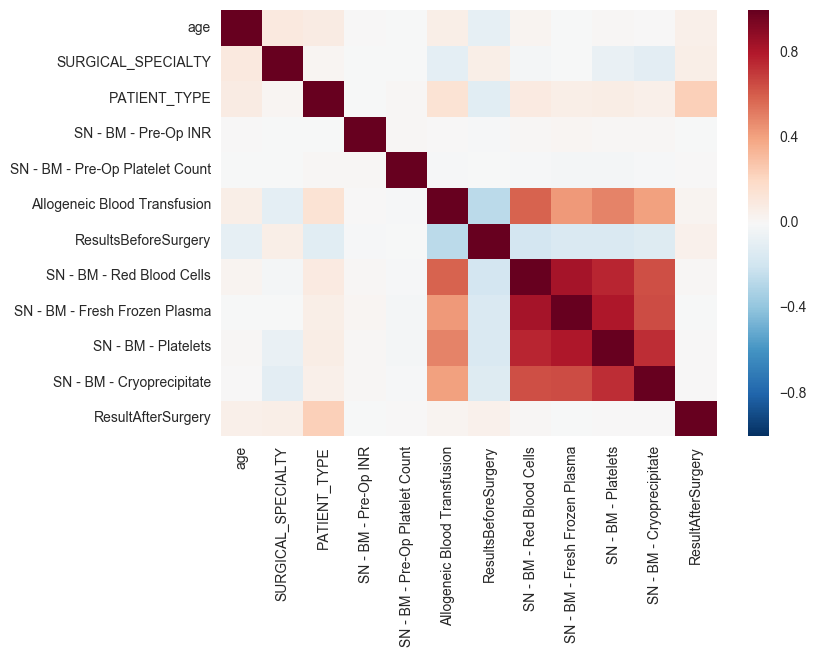

In [170]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pearson,vmin=-1, vmax=1)
plt.show()

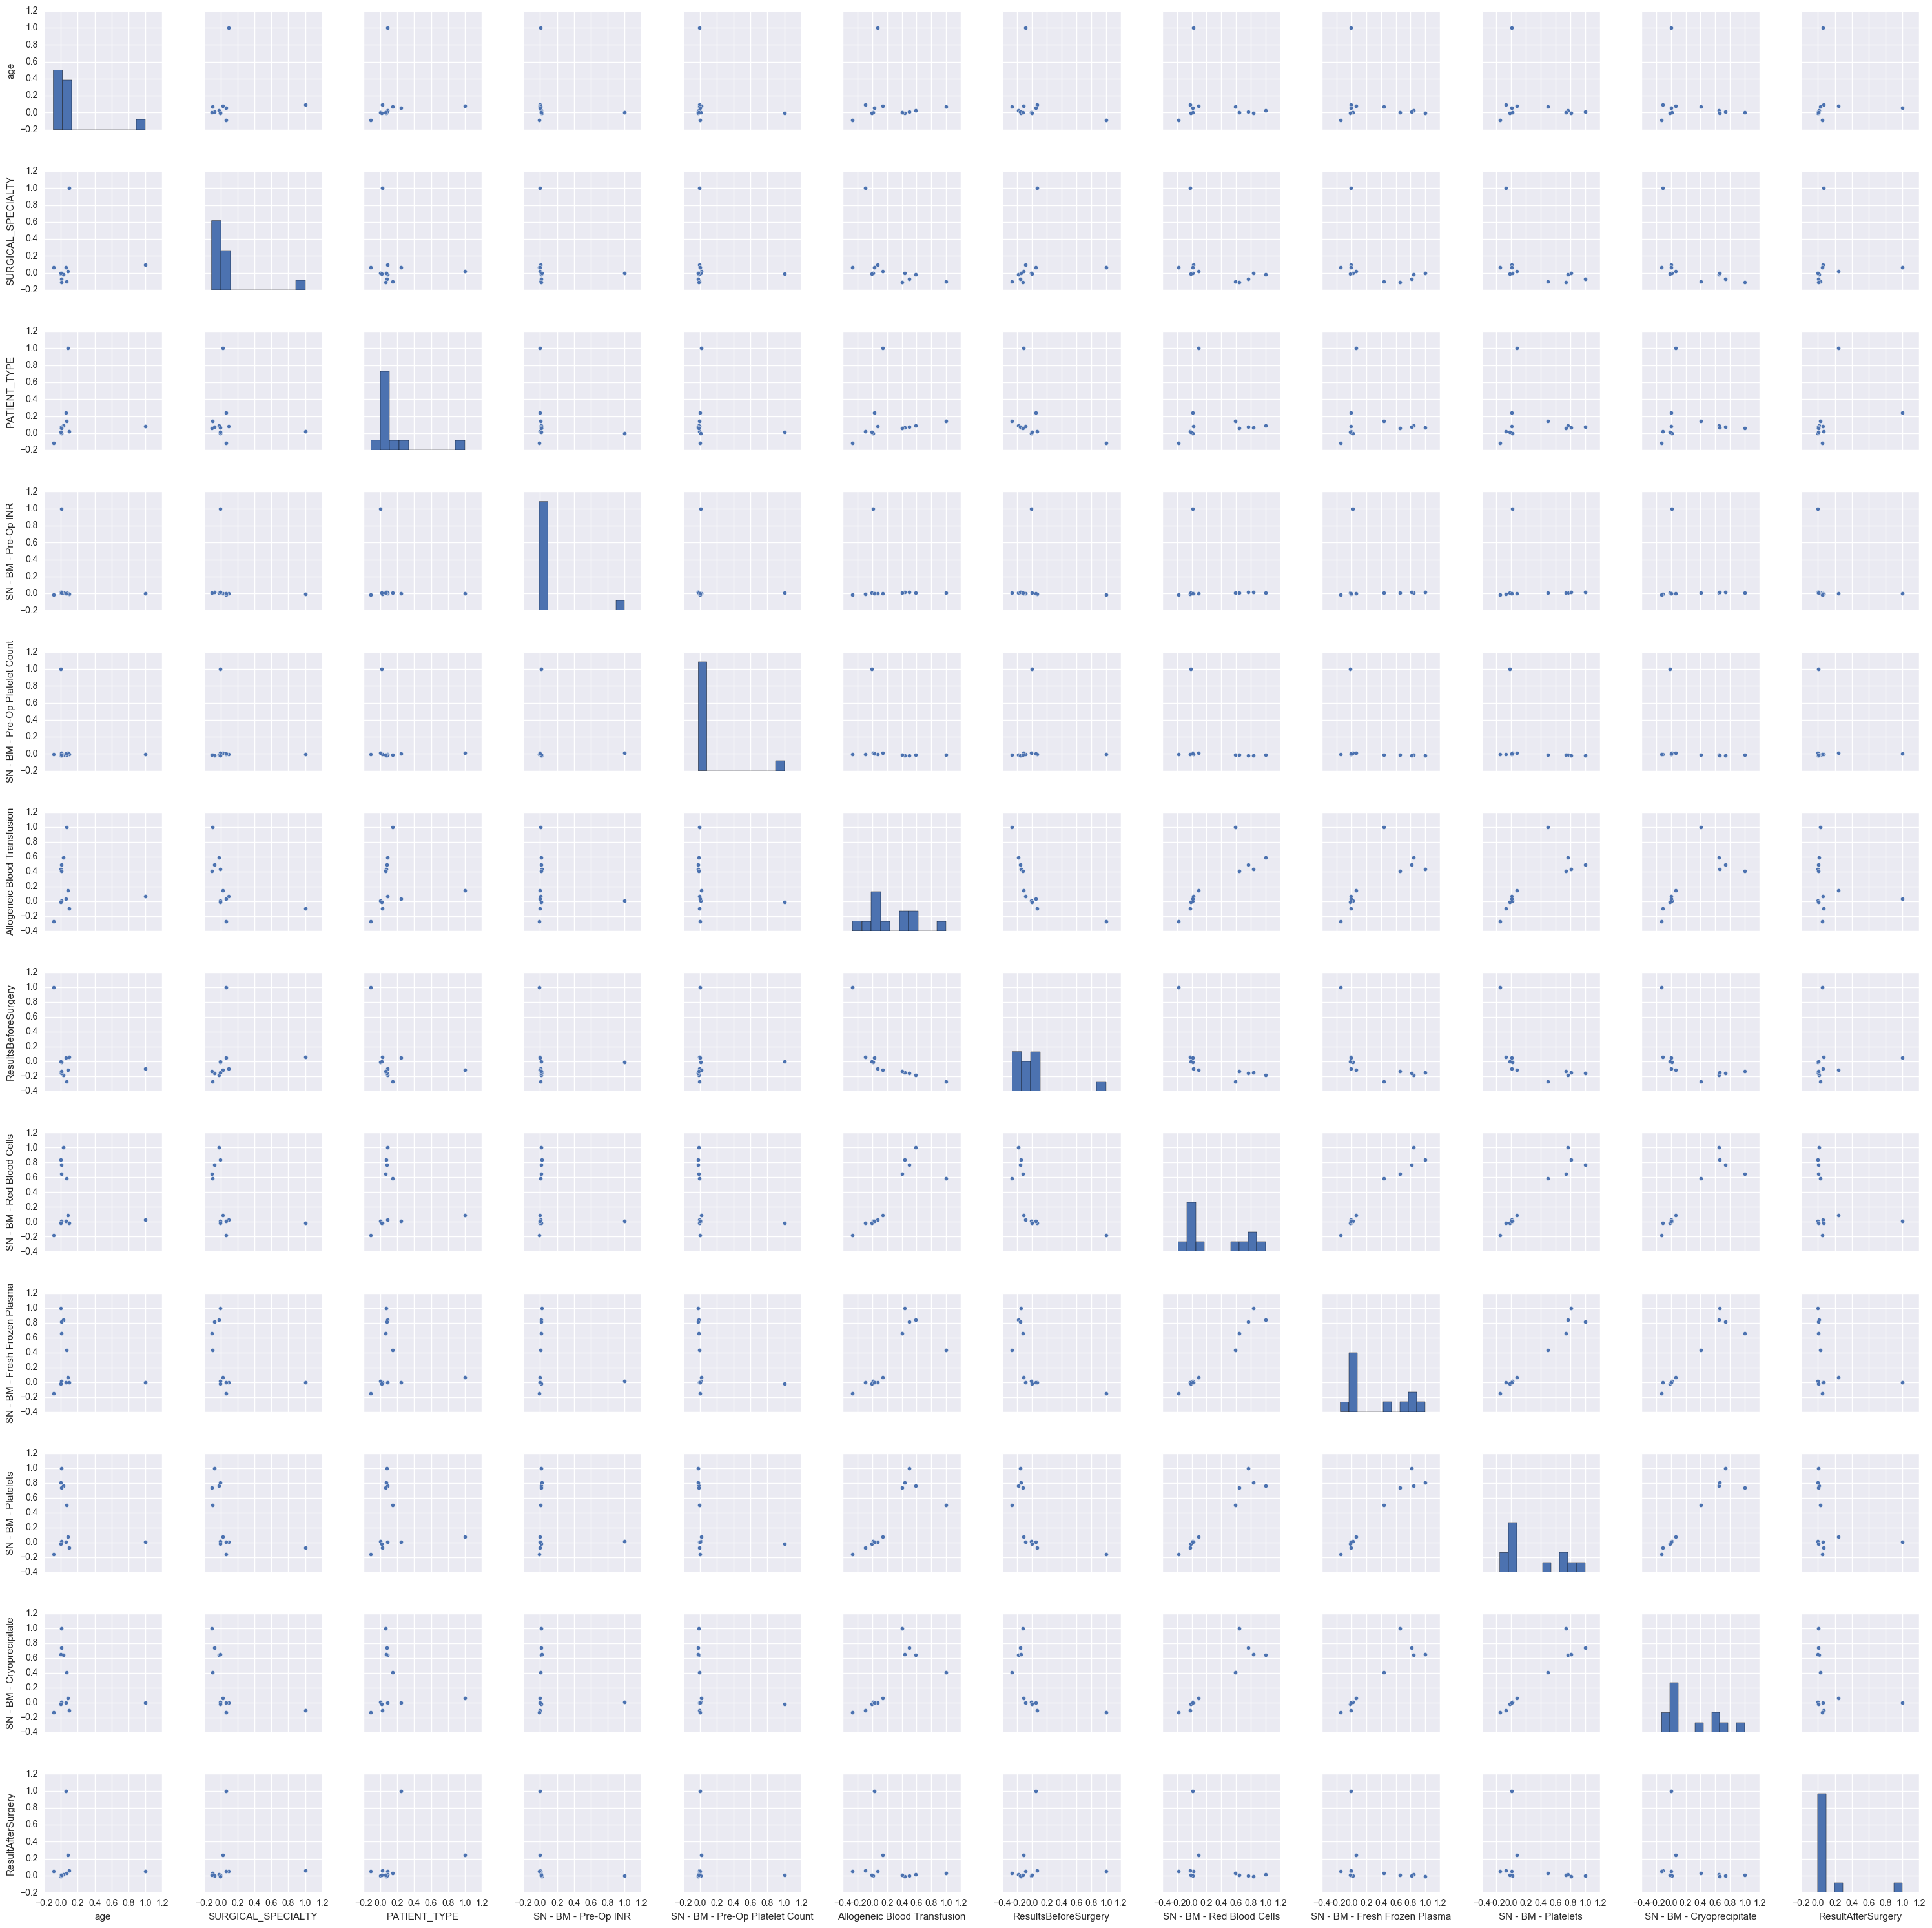

In [171]:
import matplotlib.pyplot as plt
g=sns.pairplot(pearson)
# plt.show()
# g.show()

plt.show()

In [173]:
#converting to categorical variables
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes

df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
# df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
# df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes

df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
# df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes

# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].astype('category')
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].cat.codes
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].astype('category')
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].cat.codes

# df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
# df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')

In [174]:
df.head()

,age,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,15,0,0.000,0.00,0,15.6063,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
1,48.0,3,4,0.000,0.00,0,14.5018,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
2,25.0,3,0,0.904,288.09,0,17.0057,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
3,29.0,3,0,0.000,0.00,0,13.3047,-0.218826,-0.162185,-0.186121,-0.151659,0.0000
4,56.0,3,2,0.000,0.00,0,11.6062,-0.218826,-0.162185,-0.186121,-0.151659,10.2062


In [175]:
#finding pearson corealtion between the columns
pearson = df.corr(method='spearman')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

ResultsBeforeSurgery               0.236666
SN - BM - Fresh Frozen Plasma     -0.051946
SN - BM - Red Blood Cells         -0.048059
SN - BM - Platelets               -0.047994
SN - BM - Cryoprecipitate         -0.042637
SN - BM - Pre-Op INR              -0.025743
age                                0.014703
SN - BM - Pre-Op Platelet Count   -0.003616
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [192]:
del df['PATIENT_TYPE']

In [193]:
trueTestDF=df[df['ResultAfterSurgery']==0]
trueTestDF.head()
df=df.drop(trueTestDF.index)

In [194]:
trueTestDF.head()

,age,SURGICAL_SPECIALTY,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery


In [197]:
# grouped = df.groupby('PATIENT_TYPE')
# print grouped.size()

In [198]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:-1],
                                                    df.ix[:,-1],
                                                    test_size=0.2,
                                                    random_state=0)

In [199]:
print(X_train.shape)
print(X_test.shape)
print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))

(15285, 9)
(3822, 9)
Training/Test Ratio: 3


In [200]:
parameters = {
              'n_estimators': 600, 
              'max_depth': 6, 
              'min_samples_split': 2,
              'learning_rate': 0.01, 
              'loss': 'huber'
             }
#2500 4 2 0.01 ls

In [201]:
from sklearn import ensemble
from sklearn import metrics
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)

print('Mean Square Error: {:.3f}'.format(mse))

Mean Square Error: 2.138


In [202]:
mae = metrics.mean_absolute_error(y_test,predictions)
print mae

1.06706244448


In [203]:
c=pd.DataFrame(np.concatenate(([np.array(y_test)],[np.array(predictions)]),axis=0).reshape(len(predictions),2),columns=['True','Predicted'])

In [204]:
c

,True,Predicted
0,9.408900,9.904800
1,11.602400,11.303100
2,10.804100,12.605000
3,11.305400,10.303600
4,12.004700,14.705600
5,9.602700,9.803400
6,9.908500,8.506100
7,10.801200,7.608500
8,10.306000,13.505400
9,11.704600,8.207000


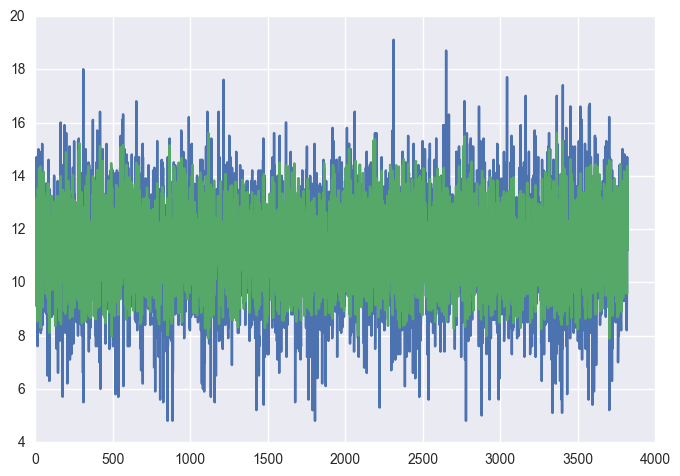

In [205]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test))
plt.plot(predictions)
plt.show()

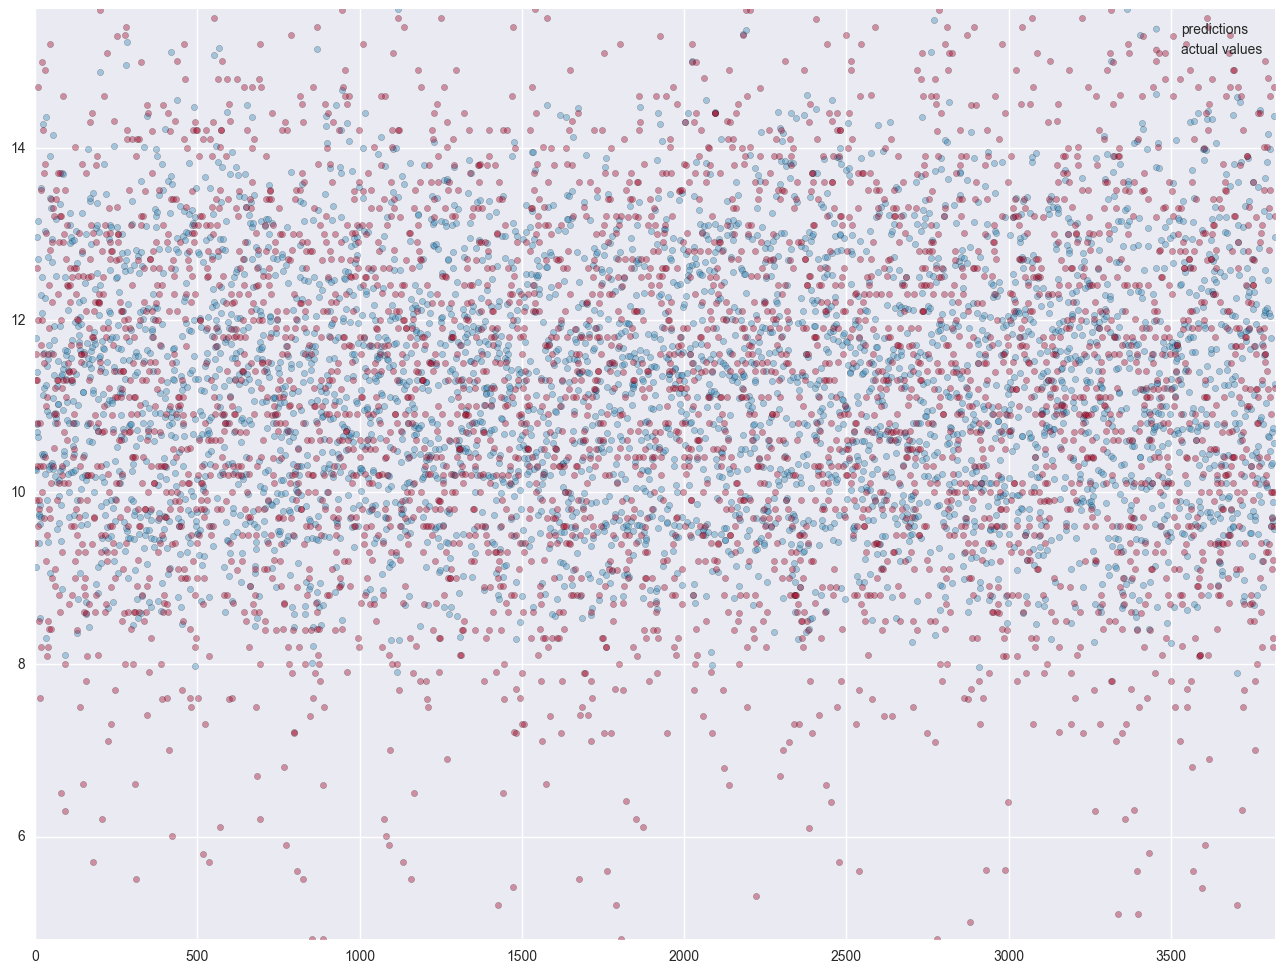

In [206]:
plt.figure(figsize=(16, 12))

plt.scatter(range(predictions.shape[0]), predictions, label='predictions', c='#348ABD', alpha=0.4)
plt.scatter(range(y_test.shape[0]), y_test, label='actual values', c='#A60628', alpha=0.4)
plt.ylim([y_test.min(), predictions.max()])
plt.xlim([0, predictions.shape[0]])
plt.legend();
plt.show()

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function staged_decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


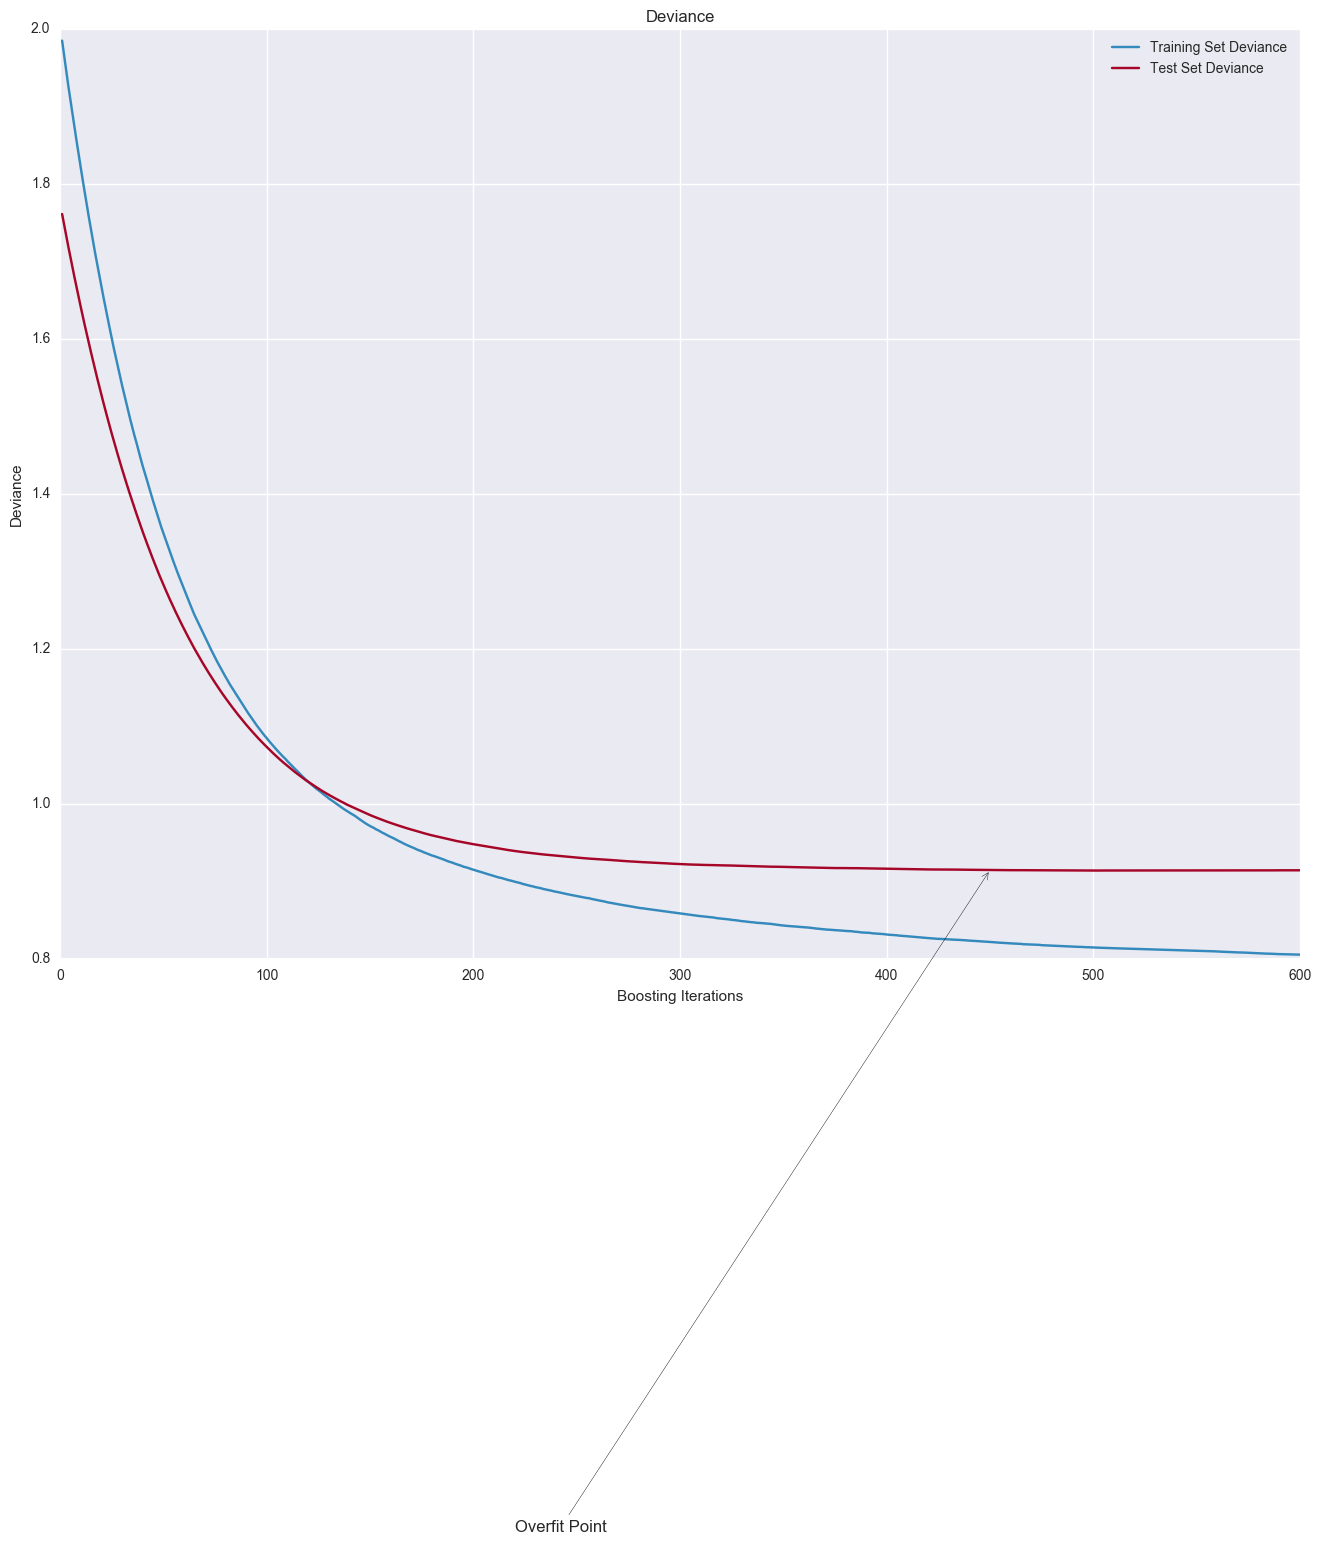

In [207]:
test_score = [classifier.loss_(y_test, y_pred) for y_pred in classifier.staged_decision_function(X_test)]

plt.figure(figsize=(16, 12))
plt.title('Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, classifier.train_score_, c='#348ABD',
         label='Training Set Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, test_score, c='#A60628',
         label='Test Set Deviance');
plt.annotate('Overfit Point', xy=(450, test_score[450]), xycoords='data',
            xytext=(220, 0.06), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');
plt.show()

In [ ]:
target = 'Disbursed'
IDcol = 'ID'

In [246]:
def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    c=pd.DataFrame(np.concatenate(([np.array(target)],[np.array(dtrain_predictions)]),axis=0).reshape(len(dtrain_predictions),2),columns=['True','Predicted'])
    print c
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], target, cv=cv_folds, scoring='mean_squared_error')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.mean_squared_error(target, dtrain_predictions)
#     print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()

In [218]:
predictors = X_train.columns
gbm0 = ensemble.GradientBoostingRegressor(random_state=10)
modelfit(gbm0, X_train, predictors, y_train)

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl


Model Report
Accuracy : 2.087
CV Score : Mean - -2.203337 | Std - 0.09967841 | Min - -2.351457 | Max - -2.043803


//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [233]:
param_test1 = {'n_estimators':range(20,1000,10)}

In [234]:
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, min_samples_split=600,min_samples_leaf=50,max_depth=8,max_features='auto',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=50,
             min_samples_split=600, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=10,
             subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570,...800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

In [235]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.14557, std: 0.00509, params: {'n_estimators': 20},
  mean: 0.19966, std: 0.00706, params: {'n_estimators': 30},
  mean: 0.24441, std: 0.00878, params: {'n_estimators': 40},
  mean: 0.28108, std: 0.01022, params: {'n_estimators': 50},
  mean: 0.31142, std: 0.01148, params: {'n_estimators': 60},
  mean: 0.33661, std: 0.01261, params: {'n_estimators': 70},
  mean: 0.35737, std: 0.01370, params: {'n_estimators': 80},
  mean: 0.37459, std: 0.01450, params: {'n_estimators': 90},
  mean: 0.38904, std: 0.01517, params: {'n_estimators': 100},
  mean: 0.40100, std: 0.01575, params: {'n_estimators': 110},
  mean: 0.41102, std: 0.01639, params: {'n_estimators': 120},
  mean: 0.41945, std: 0.01700, params: {'n_estimators': 130},
  mean: 0.42647, std: 0.01748, params: {'n_estimators': 140},
  mean: 0.43248, std: 0.01794, params: {'n_estimators': 150},
  mean: 0.43764, std: 0.01845, params: {'n_estimators': 160},
  mean: 0.44195, std: 0.01876, params: {'n_estimators': 170},
  mean: 0.44565,

In [239]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,2001,200)}
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.1, n_estimators=950, max_features='auto', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.44590, std: 0.02069, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.44907, std: 0.02265, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.44849, std: 0.02100, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.44901, std: 0.02159, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.45071, std: 0.02032, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.44954, std: 0.02159, params: {'min_samples_split': 1200, 'max_depth': 5},
  mean: 0.45165, std: 0.02062, params: {'min_samples_split': 1400, 'max_depth': 5},
  mean: 0.45133, std: 0.02145, params: {'min_samples_split': 1600, 'max_depth': 5},
  mean: 0.45161, std: 0.02152, params: {'min_samples_split': 1800, 'max_depth': 5},
  mean: 0.45119, std: 0.02048, params: {'min_samples_split': 2000, 'max_depth': 5},
  mean: 0.42495, std: 0.02341, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.42986, std: 0.02425, params: {'min_samples_split': 400, 'max_depth': 7}

In [241]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=950,max_depth=5,max_features='auto', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[predictors],y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.47106, std: 0.02155, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.47024, std: 0.02140, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.46997, std: 0.02111, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.46927, std: 0.02064, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.46891, std: 0.02059, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.46817, std: 0.02053, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.47117, std: 0.02161, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.47039, std: 0.02149, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.47011, std: 0.02141, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.46947, std: 0.02086, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.46923, std: 0.02085, params: {'min_samples_split': 1800, 'min_samples_

            True  Predicted
0      10.306900  13.507300
1       8.701500  11.103700
2      13.408000   9.904300
3       9.708700  10.703900
4      10.304800   9.905200
5      12.301700   9.703700
6      13.008600  14.105000
7       6.902200  11.106800
8       9.006100   7.407800
9      12.602900  10.502500
10     10.403700  12.003600
11     13.208500  11.401300
12     11.707600  11.303100
13     11.603800  11.607400
14     15.402100  11.406700
15     11.107900  13.205300
16     11.101200   9.304700
17     14.105000  11.201500
18      9.006000   9.503100
19     11.302200  10.407400
20     10.804000   9.907300
21     11.106500  11.406700
22     10.102600  11.407600
23      7.103300  11.103300
24     13.405300  12.408500
25      9.903900  13.404900
26     11.301600  13.707200
27     11.102700   9.403900
28     11.601500   5.702800
29     10.903500   9.904600
...          ...        ...
15255  10.579561  11.010920
15256  10.749435  13.372609
15257   9.007426   9.934535
15258  11.382116  11

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl


Model Report
Accuracy : 2.077
CV Score : Mean - -2.190005 | Std - 0.09764307 | Min - -2.323276 | Max - -2.028903


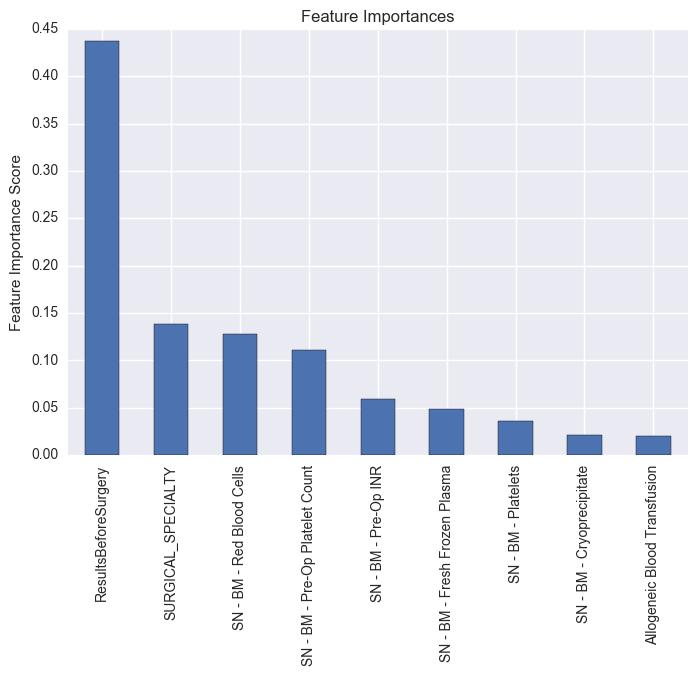

In [247]:
modelfit(gsearch3.best_estimator_, X_train, predictors,y_train)

In [251]:
X_train.columns

Index([u'SURGICAL_SPECIALTY', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'Allogeneic Blood Transfusion',
       u'ResultsBeforeSurgery', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate'],
      dtype='object')

In [254]:
param_test4 = {'max_features':range(3,9,1)}
gsearch4 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=950,max_depth=5, min_samples_split=1000, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[predictors],y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.47273, std: 0.02183, params: {'max_features': 3},
  mean: 0.47325, std: 0.02124, params: {'max_features': 4},
  mean: 0.47299, std: 0.02149, params: {'max_features': 5},
  mean: 0.47246, std: 0.02158, params: {'max_features': 6},
  mean: 0.47212, std: 0.02168, params: {'max_features': 7},
  mean: 0.47143, std: 0.02159, params: {'max_features': 8}],
 {'max_features': 4},
 0.47324975928735108)

            True  Predicted
0      10.306900  13.507300
1       8.701500  11.103700
2      13.408000   9.904300
3       9.708700  10.703900
4      10.304800   9.905200
5      12.301700   9.703700
6      13.008600  14.105000
7       6.902200  11.106800
8       9.006100   7.407800
9      12.602900  10.502500
10     10.403700  12.003600
11     13.208500  11.401300
12     11.707600  11.303100
13     11.603800  11.607400
14     15.402100  11.406700
15     11.107900  13.205300
16     11.101200   9.304700
17     14.105000  11.201500
18      9.006000   9.503100
19     11.302200  10.407400
20     10.804000   9.907300
21     11.106500  11.406700
22     10.102600  11.407600
23      7.103300  11.103300
24     13.405300  12.408500
25      9.903900  13.404900
26     11.301600  13.707200
27     11.102700   9.403900
28     11.601500   5.702800
29     10.903500   9.904600
...          ...        ...
15255  10.616652  11.017143
15256  10.950068  13.301831
15257   8.920114   9.938947
15258  11.371029  11

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl


Model Report
Accuracy : 2.078
CV Score : Mean - -2.181614 | Std - 0.09684356 | Min - -2.31533 | Max - -2.025104


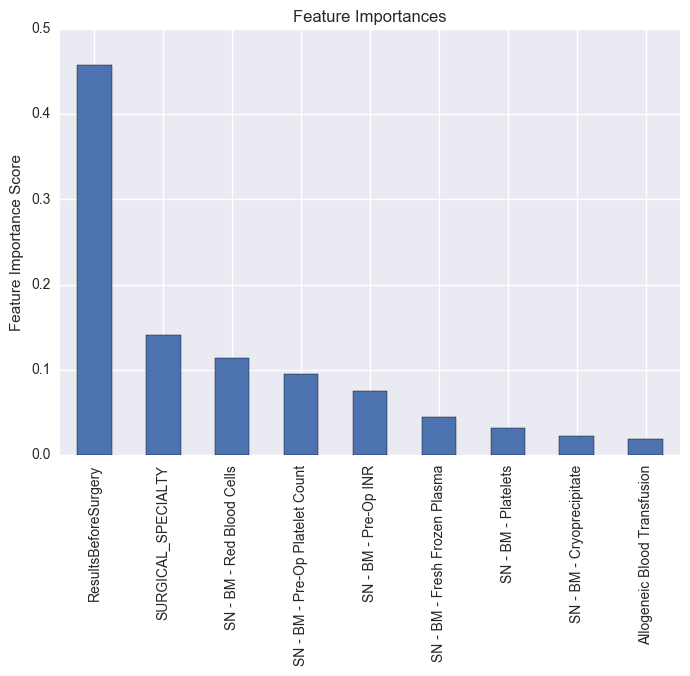

In [255]:
modelfit(gsearch4.best_estimator_, X_train, predictors,y_train)

In [268]:
pred=gsearch4.best_estimator_.predict(X_test)
c=pd.DataFrame(np.concatenate(([np.array(y_test)],[np.array(pred)]),axis=0).reshape(len(pred),2),columns=['True','Predicted'])
print metrics.r2_score(y_test,pred)

0.481691467983


In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = LinearRegression()
grid = GridSearchCV(model,parameters)
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "Grid best score: ", grid.best_score_
print "Grid score function: ", grid.score(X_test,y_test)
print metrics.r2_score(y_test,predictions)

Grid best score:  0.324124670227
Grid score function:  0.315566777819
0.315566777819


In [278]:
y_train.isnull().any()

False

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_test1 = {'hidden_layer_sizes':range(50,2000,100)}
mlpsearch1 = GridSearchCV(estimator = MLPRegressor(learning_rate='adaptive',random_state=10,activation='relu'), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
mlpsearch1.fit(X_train[predictors],y_train)
mlpsearch1.grid_scores_, mlpsearch1.best_params_, mlpsearch1.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -166.21620, std: 243.97064, params: {'hidden_layer_sizes': 50},
  mean: -804.16299, std: 648.03779, params: {'hidden_layer_sizes': 150},
  mean: -761.07375, std: 692.60176, params: {'hidden_layer_sizes': 250},
  mean: -6827.23881, std: 11123.75533, params: {'hidden_layer_sizes': 350},
  mean: -2047.85529, std: 2677.25703, params: {'hidden_layer_sizes': 450},
  mean: -3888.29886, std: 6525.25398, params: {'hidden_layer_sizes': 550},
  mean: -1338.21911, std: 1704.03101, params: {'hidden_layer_sizes': 650},
  mean: -2822.67715, std: 2190.66905, params: {'hidden_layer_sizes': 750},
  mean: -140.58796, std: 111.90350, params: {'hidden_layer_sizes': 850},
  mean: -6158.95343, std: 11266.20100, params: {'hidden_layer_sizes': 950},
  mean: -1857.97888, std: 2155.52907, params: {'hidden_layer_sizes': 1050},
  mean: -3571.15755, std: 4597.70878, params: {'hidden_layer_sizes': 1150},
  mean: -3094.34704, std: 3381.36102, params: {'hidden_layer_sizes': 1250},
  mean: -1889.48928, std: 219

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_test1 = {'hidden_layer_sizes':range(50,2000,50)}
mlpsearch1 = GridSearchCV(estimator = MLPRegressor(learning_rate='constant',random_state=10,activation='relu'), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
mlpsearch1.fit(X_train[predictors],y_train)
mlpsearch1.grid_scores_, mlpsearch1.best_params_, mlpsearch1.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -166.21620, std: 243.97064, params: {'hidden_layer_sizes': 50},
  mean: -139.12185, std: 155.20637, params: {'hidden_layer_sizes': 100},
  mean: -804.16299, std: 648.03779, params: {'hidden_layer_sizes': 150},
  mean: -944.76966, std: 1348.21365, params: {'hidden_layer_sizes': 200},
  mean: -761.07375, std: 692.60176, params: {'hidden_layer_sizes': 250},
  mean: -545.96784, std: 723.16670, params: {'hidden_layer_sizes': 300},
  mean: -6827.23881, std: 11123.75533, params: {'hidden_layer_sizes': 350},
  mean: -2761.97767, std: 4095.62269, params: {'hidden_layer_sizes': 400},
  mean: -2047.85529, std: 2677.25703, params: {'hidden_layer_sizes': 450},
  mean: -252.28073, std: 365.13380, params: {'hidden_layer_sizes': 500},
  mean: -3888.29886, std: 6525.25398, params: {'hidden_layer_sizes': 550},
  mean: -3238.36079, std: 3155.22233, params: {'hidden_layer_sizes': 600},
  mean: -1338.21911, std: 1704.03101, params: {'hidden_layer_sizes': 650},
  mean: -457.98000, std: 703.77770, pa

In [285]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
metrics.r2_score(y_test,pred)

0.30132300758879349

In [299]:
import pandas as pd
from sklearn.grid_search import GridSearchCV

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': np.min(scores),
                 'max_score': np.max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series(dict(params.items() + d.items()))

        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                     for k in self.keys
                     for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [307]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models2 = { 
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(), 
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

params2 = { 
    'LinearRegression': { },
    'Ridge': { 'alpha': [0.1, 1.0] },
    'Lasso': { 'alpha': [0.1, 1.0] },
    'GradientBoostingRegressor': {'n_estimators': [100,200,300,400,500], 'learning_rate': [0.1, 1.0],'max_depth':[5,10], 'min_samples_split':[500,1000], 'min_samples_leaf': [25,50,100], 'subsample':[0.8]}
}


In [308]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X_train, y_train, n_jobs=-1,scoring="neg_mean_squared_error")

Running GridSearchCV for GradientBoostingRegressor.
Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.5min finished


Running GridSearchCV for Ridge.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished


Running GridSearchCV for LinearRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Running GridSearchCV for Lasso.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished


In [309]:
helper2.score_summary()


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,estimator,min_score,mean_score,max_score,std_score,alpha,learning_rate,max_depth,min_samples_leaf,min_samples_split,n_estimators,subsample
0,GradientBoostingRegressor,-2.24523,-2.19167,-2.09697,0.0671551,NaN,0.1,5,25,500,100,0.8
10,GradientBoostingRegressor,-2.23907,-2.19173,-2.10514,0.0613174,NaN,0.1,5,50,500,100,0.8
45,GradientBoostingRegressor,-2.24396,-2.19254,-2.10236,0.0639715,NaN,0.1,10,50,1000,100,0.8
11,GradientBoostingRegressor,-2.23968,-2.19258,-2.10297,0.063394,NaN,0.1,5,50,500,200,0.8
21,GradientBoostingRegressor,-2.23661,-2.19374,-2.11037,0.0589614,NaN,0.1,5,100,500,200,0.8
16,GradientBoostingRegressor,-2.24362,-2.194,-2.11228,0.0582243,NaN,0.1,5,50,1000,200,0.8
40,GradientBoostingRegressor,-2.24299,-2.19401,-2.1074,0.06142,NaN,0.1,10,50,500,100,0.8
1,GradientBoostingRegressor,-2.24641,-2.19541,-2.1052,0.0639696,NaN,0.1,5,25,500,200,0.8
17,GradientBoostingRegressor,-2.23969,-2.19552,-2.10843,0.061586,NaN,0.1,5,50,1000,300,0.8
12,GradientBoostingRegressor,-2.2408,-2.19606,-2.10846,0.0619445,NaN,0.1,5,50,500,300,0.8
